# Met Data Analysis
by Bharat Sharma <br>
sharmabd@ornl.gov <br>
Site: US-DUKE



In [1]:
# importing libraries
import xarray as xr
import glob
from datetime import datetime
import cftime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Files
- **ELM-DUKE** : has the nc files that we use to run the current version of ELM-FATES <br>
- **[FACEMDS_Walker2018](https://data.ess-dive.lbl.gov/view/ess-dive-7807cf86f1dd42a-20181127T173047368940)** : Processed Data (My focus: DUKE) <br>
- **[DukeFACE_Oren2022](https://data.ess-dive.lbl.gov/view/doi:10.15485/1895465)**: Updated DUKE met Data


In [2]:
# paths

paths = {}
paths ["ELM-DUKE"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/"
paths ["FACEMDS_Walker2018"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/"
paths ["DukeFACE_Oren2022"] = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/"

In [3]:
paths

{'ELM-DUKE': '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/',
 'FACEMDS_Walker2018': '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/',
 'DukeFACE_Oren2022': '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/'}

## ELM Duke Data

In [4]:
key = "ELM-DUKE"
glob.glob(f"{paths[key]}*.nc")

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/2005-02.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/2003-07.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/2002-09.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/2001-03.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/1996-06.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/1998-05.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/1997-08.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/2006-08.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-

In [5]:
filename= glob.glob(f"{paths[key]}*.nc")[0]
ds_elm = xr.open_dataset(filename)
ds_elm

<xarray.Dataset>
Dimensions:   (time: 1344, lat: 1, lon: 1, scalar: 1)
Coordinates:
  * time      (time) object 2005-02-01 00:00:00 ... 2005-02-28 23:30:00
Dimensions without coordinates: lat, lon, scalar
Data variables: (12/14)
    LONGXY    (lat, lon) float64 ...
    LATIXY    (lat, lon) float64 ...
    ZBOT      (time, lat, lon) float64 ...
    EDGEW     (scalar) float64 ...
    EDGEE     (scalar) float64 ...
    EDGES     (scalar) float64 ...
    ...        ...
    RH        (time, lat, lon) float64 ...
    WIND      (time, lat, lon) float64 ...
    FSDS      (time, lat, lon) float64 ...
    FLDS      (time, lat, lon) float64 ...
    PSRF      (time, lat, lon) float64 ...
    PRECTmms  (time, lat, lon) float64 ...
Attributes:
    institution:    Oak Ridge National Laboratory
    history:        File Origin - This file was created at Oak Ridge National...
    site_location:  Latitude:  35.90000   Longitude:   275.66670 Elevation (m...

In [6]:
print (ds_elm.time)

<xarray.DataArray 'time' (time: 1344)>
array([cftime.DatetimeNoLeap(2005, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 2, 1, 0, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 2, 1, 1, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2005, 2, 28, 22, 30, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 2, 28, 23, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 2, 28, 23, 30, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2005-02-01 00:00:00 ... 2005-02-28 23:30:00
Attributes:
    long_name:  Time axis


In [7]:
ds_elm_all= xr.open_mfdataset(glob.glob(f"{paths[key]}*.nc"))

In [8]:
#cftime to datetime 

def cftime_to_dtime (cftime_object):
    # Convert cftime.DatetimeNoLeap to datetime
    datetime_object = datetime(
        year=cftime_object.year,
        month=cftime_object.month,
        day=cftime_object.day,
        hour=cftime_object.hour,
        minute=cftime_object.minute,
        second=cftime_object.second,
        microsecond=cftime_object.microsecond,
    )
    return datetime_object

time_objects = [cftime_to_dtime (t) for t in ds_elm_all.time.values]
print (time_objects)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



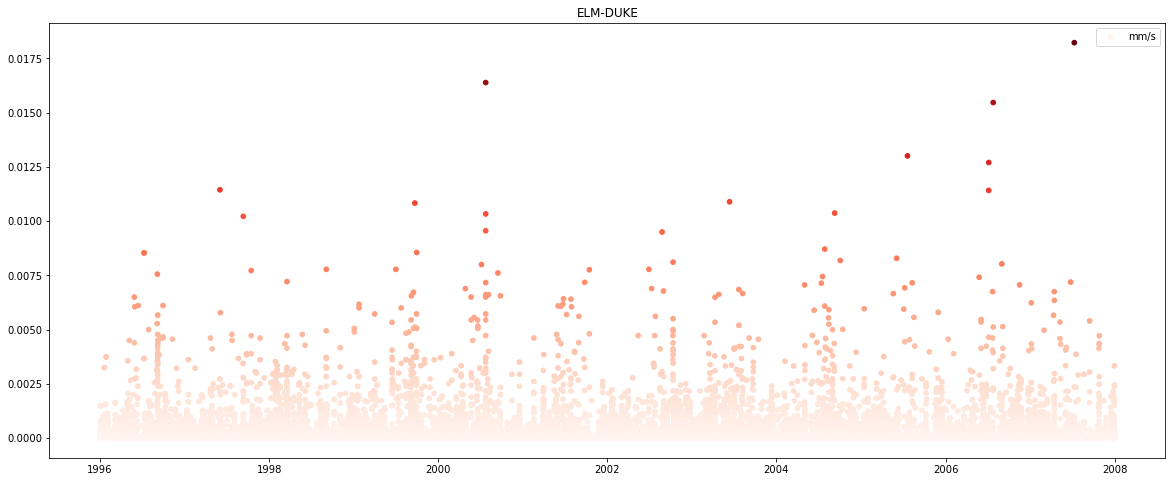

In [9]:
fig1 = plt.figure(figsize=(20,8))
plt.scatter(x= time_objects, y=ds_elm_all.PRECTmms, 
            c=ds_elm_all.PRECTmms, cmap='Reds', 
            s=22, marker = 'o',label = ds_elm_all.PRECTmms.units,
           )
plt.title(f"{key}")
plt.legend()

In [10]:
print (len(time_objects))
print (time_objects[0])
print (time_objects[-1])

210240
1996-01-01 00:00:00
2007-12-31 23:30:00


## Investigating FACEMDS_Walker2018

In [11]:
key = "FACEMDS_Walker2018"
glob.glob(f"{paths[key]}*.nc")

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/PHAC_T_forcing_y.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/DUKE_forcing_h.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/PHAC_T_forcing_d.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/RHIN_forcing_d.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/ORNL_forcing_y.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/PHAC_forcing_d.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/KSCO_chamber_forcing_h.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/NDFF_forcing_d.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/ORNL_forcing_d.nc',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/RHIN_forcing_y.nc',
 '/Users

In [12]:
import netCDF4 as nc4

In [13]:
ds_nc_Walker_h = nc4.Dataset(f"{paths[key]}DUKE_forcing_h.nc")

In [14]:
ds_nc_Walker_h.variables['TIME']

<class 'netCDF4._netCDF4.Variable'>
int32 TIME(tstep)
    units: seconds since 1996-01-01 00:00:00
    long_name: Time axis
    calendar: gregorian
    title: Time marked at the middle of measurement interval
    time_origin: 1996-JAN-01 00:00:00
unlimited dimensions: tstep
current shape = (210384,)
filling on, default _FillValue of -2147483647 used

In [15]:
ds_Walker_h= xr.open_dataset(f"{paths[key]}DUKE_forcing_h.nc", decode_times=False)

In [16]:
ds_Walker_h.variables

Frozen({'nav_lat': <xarray.Variable (y: 1)>
array([35.9782], dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  Latitude, 'nav_lon': <xarray.Variable (x: 1)>
array([-79.0942], dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  Longitude, 'YEAR': <xarray.Variable (tstep: 210384)>
[210384 values with dtype=int32]
Attributes:
    units:      ---
    long_name:  Year of measurement, 'DOY': <xarray.Variable (tstep: 210384)>
[210384 values with dtype=int32]
Attributes:
    units:      ---
    long_name:  Day of year, 'HRMIN': <xarray.Variable (tstep: 210384)>
[210384 values with dtype=int32]
Attributes:
    units:      ---
    long_name:  Hour:minute - marked at the middle of measurement interval wi..., 'TIME': <xarray.Variable (tstep: 210384)>
[210384 values with dtype=int32]
Attributes:
    units:        seconds since 1996-01-01 00:00:00
    long_name:    Time axis
    calendar:     gregorian
    title:        Time marked at the middle of measurem

In [17]:
ds_Walker_h.TIME[...].values

array([      900,      2700,      4500, ..., 378686700, 378688500,
       378690300], dtype=int32)

In [18]:
len(ds_Walker_h.TIME[...].values)

210384

In [19]:
# Write a function to convert seconds to datetime 

In [20]:
from datetime import datetime, timedelta

def seconds_to_datetime(seconds, reference_date):
    return reference_date + timedelta(seconds=seconds)

reference_date= datetime(1996, 1, 1, 0 , 0)

list_seconds = ds_Walker_h.TIME[...].values
list_seconds= np.asarray(list_seconds, dtype = float)
resulting_datetime = [seconds_to_datetime(seconds,reference_date) for seconds in list_seconds]
print(resulting_datetime)  # Output: 2021-08-18 00:00:00


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


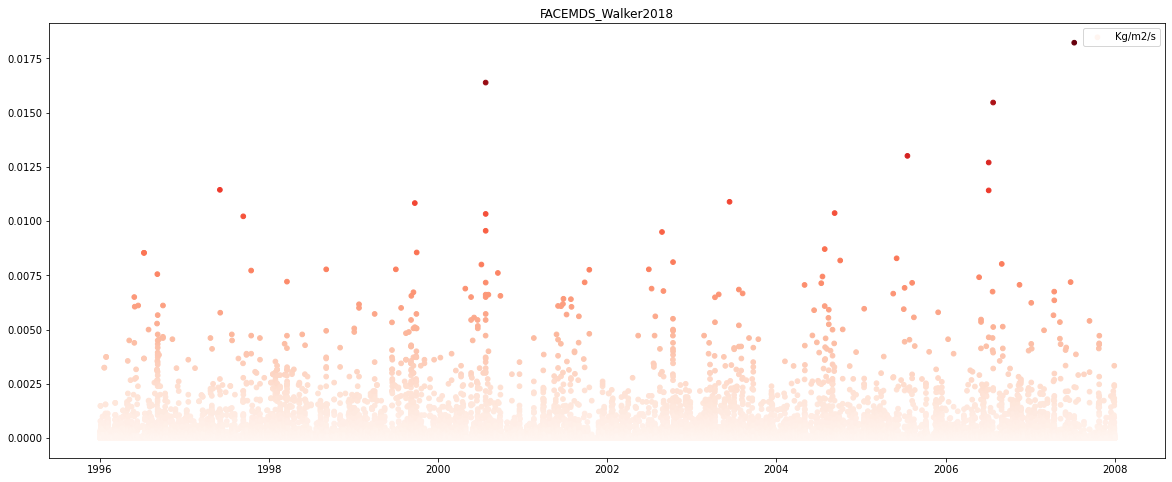

In [21]:
fig2 = plt.figure(figsize=(20,8))
plt.scatter(x= resulting_datetime, y=ds_Walker_h['Rainf'], 
            c=ds_Walker_h['Rainf'], cmap='Reds', 
            s=22, marker = 'o',label = ds_Walker_h['Rainf'].units
           )
plt.title(f"{key}")
plt.legend()

### FACEMDS_Walker CSV files

In [22]:
key = "FACEMDS_Walker2018"
glob.glob(f"{paths[key]}DUKE*_h.txt")

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Walker_2018_FATES_MDS/data/DUKE_forcing_h.txt']

#### Reading Hourly files

In [23]:
df_FACEMDS = {}
df_FACEMDS ['h'] = pd.read_csv(glob.glob(f"{paths[key]}DUKE*_h.txt")[0], delimiter= '\t')
print(len(df_FACEMDS ['h'] .columns))
df_FACEMDS ['h'] .columns

30


/Users/ud4/opt/anaconda3/envs/pyces/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['YEAR', 'DTIME', 'DOY', 'HRMIN', 'Rainf', 'Rainf_f ', 'Tair', 'Tair_f',
       'RH', 'RH_f', 'VPD', 'VPD_f', 'Qair', 'Qair_f', 'Wind', 'Wind_f',
       'SWdown', 'SWdown_f', 'PAR', 'PAR_f', 'LWdown', 'LWdown_f', 'PSurf',
       'PSurf_f', 'aCO2', 'eCO2', 'aO3', 'eO3', 'Ndep', 'SolarElevation'],
      dtype='object')

## Oren New Met Data

In [24]:
dict_dfs_common = {}


In [25]:
# Specify the file path
DuplicateDataFilename = 'DuplicateDukeData.txt'

# This file path is to document the duplicate Data in Duke Data

In [26]:
key = "DukeFACE_Oren2022"
var_key = "AT"
face_var_key = "Tair"

plots_cols = ['R1uat', 'R2uat', 'R3uat', 'R4uat','R5uat', 'R6uat', 'R7uat', 'R8uat']

### AT : Tair
units: degree Celcius

Oren Data has 3 dirs for AT for different plots, time periods, and sensors. <br>
I intend to use `*_gl.csv` files; i believe these are gap filled. <br>
I will save the mean of the plots for FACEMDS <br>
The common sensor data will be used among all the files.

In [27]:
glob.glob(f"{paths[key]}DukeFACE_{var_key}*")

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT0612',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT0405',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT9703']

In [28]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT9703/DukeFACE_AT1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT9703/DukeFACE_AT1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT9703/DukeFACE_AT1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT9703/DukeFACE_AT2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT9703/DukeFACE_AT2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT9703/DukeFACE_AT2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT9703/DukeFACE_AT2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_AT0405/DukeFACE_AT2004_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/da

In [29]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




In [30]:
dict_dfs_common[f"{face_var_key}"]

,Year,JDT,DOY,Time,Tair
0,1997,2682.71,125,1730,21.50
1,1997,2682.73,125,1800,20.41
2,1997,2682.75,125,1830,18.89
3,1997,2682.77,125,1900,17.91
4,1997,2682.79,125,1930,16.61
...,...,...,...,...,...
17563,2012,8401.90,366,2200,7.58
17564,2012,8401.92,366,2230,7.08
17565,2012,8401.94,366,2300,6.88
17566,2012,8401.96,366,2330,7.17


### Precip : Rainf
units: mm

In [31]:
key = "DukeFACE_Oren2022"
var_key = "Precip"
face_var_key = "Rainf"

plots_cols = ['FACE.PO']

In [32]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Precip9712/DukeFACE_Precip1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Precip9712/DukeFACE_Precip1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Precip9712/DukeFACE_Precip1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Precip9712/DukeFACE_Precip2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Precip9712/DukeFACE_Precip2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Precip9712/DukeFACE_Precip2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Precip9712/DukeFACE_Precip2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Precip9712/DukeFACE_Precip2004_gf.csv',
 '/Users

In [33]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




In [34]:
dict_dfs_common[f"{face_var_key}"]

,Year,JDT,DOY,Time,Rainf
0,1997,2683.00,126,30,0.0
1,1997,2683.02,126,100,0.0
2,1997,2683.04,126,130,0.0
3,1997,2683.06,126,200,0.0
4,1997,2683.08,126,230,0.0
...,...,...,...,...,...
17563,2012,8401.90,366,2200,0.0
17564,2012,8401.92,366,2230,0.0
17565,2012,8401.94,366,2300,0.0
17566,2012,8401.96,366,2330,0.0


### RH : RH
Relative Humidity

In [35]:
key = "DukeFACE_Oren2022"
var_key = "RH"
face_var_key = "RH"
plots_cols = ['R1urh', 'R2urh', 'R3urh', 'R4urh','R5urh', 'R6urh', 'R7urh', 'R8urh']

In [36]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_RH9703/DukeFACE_RH1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_RH9703/DukeFACE_RH1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_RH9703/DukeFACE_RH1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_RH9703/DukeFACE_RH2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_RH9703/DukeFACE_RH2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_RH9703/DukeFACE_RH2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_RH9703/DukeFACE_RH2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_RH0405/DukeFACE_RH2004_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/da

In [37]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




In [38]:
dict_dfs_common[f"{face_var_key}"]

,Year,JDT,DOY,Time,RH
0,1997,2682.71,125,1730,0.43
1,1997,2682.73,125,1800,0.49
2,1997,2682.75,125,1830,0.56
3,1997,2682.77,125,1900,0.52
4,1997,2682.79,125,1930,0.52
...,...,...,...,...,...
17563,2012,8401.90,366,2200,0.44
17564,2012,8401.92,366,2230,0.46
17565,2012,8401.94,366,2300,0.47
17566,2012,8401.96,366,2330,0.46


### SM:SM 
(not in existing WalkerFACEMDS Data)<br>
Soil moisture integrates measurements from 0 to 30cm depth 

In [39]:
key = "DukeFACE_Oren2022"
var_key = "SM"
face_var_key = "SM"

plots_cols = ['R1tdr', 'R2tdr', 'R3tdr', 'R4tdr','R5tdr', 'R6tdr', 'R7tdr', 'R8tdr']

In [40]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SM9712/DukeFACE_SM1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SM9712/DukeFACE_SM1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SM9712/DukeFACE_SM1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SM9712/DukeFACE_SM2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SM9712/DukeFACE_SM2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SM9712/DukeFACE_SM2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SM9712/DukeFACE_SM2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SM9712/DukeFACE_SM2004_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/da

In [41]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




### SWP: SWP 
not in existing Walker 2018 <br>
(Soil water potential) <br>
from 2007 to 2012

In [42]:
key = "DukeFACE_Oren2022"
var_key = "SWP"
face_var_key = "SWP"
plots_cols = ['R1swp', 'R2swp', 'R3swp', 'R4swp','R5swp', 'R6swp']

In [43]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SWP9712/DukeFACE_SWP2007_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SWP9712/DukeFACE_SWP2008_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SWP9712/DukeFACE_SWP2009_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SWP9712/DukeFACE_SWP2010_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SWP9712/DukeFACE_SWP2011_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SWP9712/DukeFACE_SWP2012_gf.csv']

In [44]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




### SVP: SVP

Saturated Vapor Pressure; Not in Walker 2018<br>
units kPa

In [45]:
key = "DukeFACE_Oren2022"
var_key = "SVP"
face_var_key = "SVP"
plots_cols = ['R1usvp', 'R2usvp', 'R3usvp', 'R4usvp','R5usvp', 'R6usvp', 'R7usvp', 'R8usvp']

In [46]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SVP9703/DukeFACE_SVP1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SVP9703/DukeFACE_SVP1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SVP9703/DukeFACE_SVP1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SVP9703/DukeFACE_SVP2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SVP9703/DukeFACE_SVP2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SVP9703/DukeFACE_SVP2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SVP9703/DukeFACE_SVP2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SVP0405/DukeFACE_SVP2004_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_

In [47]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




### VPD: VPD
Vapor pressure deficit <br>
Units kPa <br>

In [48]:
key = "DukeFACE_Oren2022"
var_key = "VPD"
face_var_key = "VPD"
plots_cols = ['R1uvpd', 'R2uvpd', 'R3uvpd', 'R4uvpd','R5uvpd', 'R6uvpd', 'R7uvpd', 'R8uvpd']

In [49]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_VPD9703/DukeFACE_VPD1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_VPD9703/DukeFACE_VPD1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_VPD9703/DukeFACE_VPD1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_VPD9703/DukeFACE_VPD2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_VPD9703/DukeFACE_VPD2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_VPD9703/DukeFACE_VPD2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_VPD9703/DukeFACE_VPD2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_VPD0405/DukeFACE_VPD2004_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_

In [50]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




### PAR: PAR

The data from 2008-12 was averaged to get PAN and Rn <br>
PAR - Photosynthetically active radiation, umol/m^2\*s <br>
PAR had values from only one plot for 1997-2007 and from two plots for 2008-2012, which were averaged <br> 

In [51]:
key = "DukeFACE_Oren2022"
var_key = "PAR"
face_var_key = "PAR"
plots_cols = ['PAR']

exp_filename = "Rad" # Exception in the filename

In [52]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{exp_filename}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{exp_filename}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2004_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_

In [53]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




### Rn: Rn 

Not in Walker 2018 <br>
The data from 2008-12 was averaged to get PAN and Rn <br>
Rn  - Net radiation. Q7 sensor before 2004, CNR1 thereafter, W/m^2  <br>
Rn had values from only one plot for 1997-2007 and from two plots for 2008-2012, which were averaged <br> 

In [54]:
key = "DukeFACE_Oren2022"
var_key = "Rn"
face_var_key = "Rn"
plots_cols = ['Rn']

exp_filename = "Rad" # Exception in the filename

In [55]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{exp_filename}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{exp_filename}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_Rad9707/DukeFACE_Rad2004_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_

In [56]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




### SLT: SLT

Walker 2018 does not have this data <br>
soil temperature from plots 1-6, one sensor per plot at 15 cm depth, measured in Degree Celsius. <br>
I will be averaging over plots 2-6 because 1 was upgraded over time and 15 cm depth was not avaiable later 

In [57]:
key = "DukeFACE_Oren2022"
var_key = "SLT"
face_var_key = "SLT"
plots_cols = ['R2slt', 'R3slt', 'R4slt','R5slt', 'R6slt']

In [58]:
# gap filled files
files = sorted(glob.glob(f"{paths[key]}DukeFACE_{var_key}*/*_gf.csv"))

# Define a custom sorting key function to extract the year from the file path
def extract_year(filepath):
    return int(filepath.split(f'{var_key}')[-1][:4]) # Year

# Sort the list of file paths based on the Year
sorted_filepaths = sorted(files, key=extract_year)
sorted_filepaths

['/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SLT9700/DukeFACE_SLT1997_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SLT9700/DukeFACE_SLT1998_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SLT9700/DukeFACE_SLT1999_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SLT9700/DukeFACE_SLT2000_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SLT0103/DukeFACE_SLT2001_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SLT0103/DukeFACE_SLT2002_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SLT0103/DukeFACE_SLT2003_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_DUKE_Met/data/DukeFACE_SLT0412/DukeFACE_SLT2004_gf.csv',
 '/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_

In [59]:
# Create a common dataframe
# List of column names
common_columns = ['Year', 'JDT', 'DOY', 'Time', f'{face_var_key}']

# Create an empty DataFrame with the specified columns
df_tmp_common_gf = pd.DataFrame(columns=common_columns)


selected_columns = plots_cols
# Open the file in append mode and write text
with open(DuplicateDataFilename, 'a') as duplicate_data:
    for file in sorted_filepaths:
        i_dup_file_name = 0 # to save file name once for multiple dupliate entries
        df_tmp = pd.read_csv(file)
        for lbl,gr in df_tmp.groupby(['Year','DOY','Time']):
            if len(gr) > 1:
                if i_dup_file_name == 0:
                    duplicate_data.write(f"{'/'.join(file.split('/')[-3:])}\n")
                duplicate_data.write(f"{gr.iloc[:,:4]}\n")
                i_dup_file_name+=1
                
        # Calculate the mean of selected columns
        df_tmp[f"{face_var_key}"] = round(df_tmp[selected_columns].mean(axis=1),2)
        # only saving the common columns
        df_tmp = df_tmp[common_columns]
        #Appending all the common columns to the common dataframe
        df_tmp_common_gf = df_tmp_common_gf.append(df_tmp)
    duplicate_data.write(f"\n")
dict_dfs_common[f"{face_var_key}"] = df_tmp_common_gf




### Making a common Dataframe of 30 min data

Largest timeseries is from "PAR" <br>
1997 - 2558.00 - 1 - 30 to 2012 - 8401.98 - 366 - 2400 <br>
Using these Index to fill in the rest <br>
FillValue = -6999.0

In [84]:
# list of variables 
keys_vars = list(dict_dfs_common.keys())

# Making a copy of the dataframe with most data
df_all_vars_30m =  dict_dfs_common['PAR'].copy(deep=True)

# Dropping JDT column since it is not same across vars based on Dates and time, due to which I get NaNs during merge
df_all_vars_30m = df_all_vars_30m.drop('JDT',axis=1)

for k in keys_vars:
    df_all_vars_30m = pd.merge(df_all_vars_30m, dict_dfs_common[k].drop('JDT',axis=1), how = 'left')
    
    
fill_value = -6999.    
df_all_vars_30m['Rn'] = df_all_vars_30m['Rn'].replace(fill_value, np.nan)

# Fill NaNs with -6999.0
df_all_vars_30m_FV = df_all_vars_30m.fillna(fill_value)

# Adding a datetime column 
# Convert DOY and Time to timedelta

# Convert 'Time' values to HH:MM format
time_str = df_all_vars_30m['Time'].astype(str)
time_str = time_str.str.zfill(4)  # Ensure all times are 4 digits

# Making Sure time_str in has integer values only
#time_int = time_str.astype(float).astype(int)
time_int = np.asarray(np.asarray(time_str, dtype=float), dtype =int)

# Extract hours and minutes
hours = np.asarray(time_int//100, dtype = int)
minutes = np.asarray(time_int%100, dtype = int)

# Calculate the total minutes
total_minutes = hours * 60 + minutes

df_all_vars_30m['Date'] = pd.to_timedelta(df_all_vars_30m['DOY'] - 1, unit='D') + pd.to_timedelta(total_minutes, unit='m')

# Add Year to the Date
df_all_vars_30m['Date'] = pd.to_datetime(df_all_vars_30m['Year'].astype(float).astype(int).astype(str)) + df_all_vars_30m['Date']
df_all_vars_30m_FV['Date'] = df_all_vars_30m['Date']



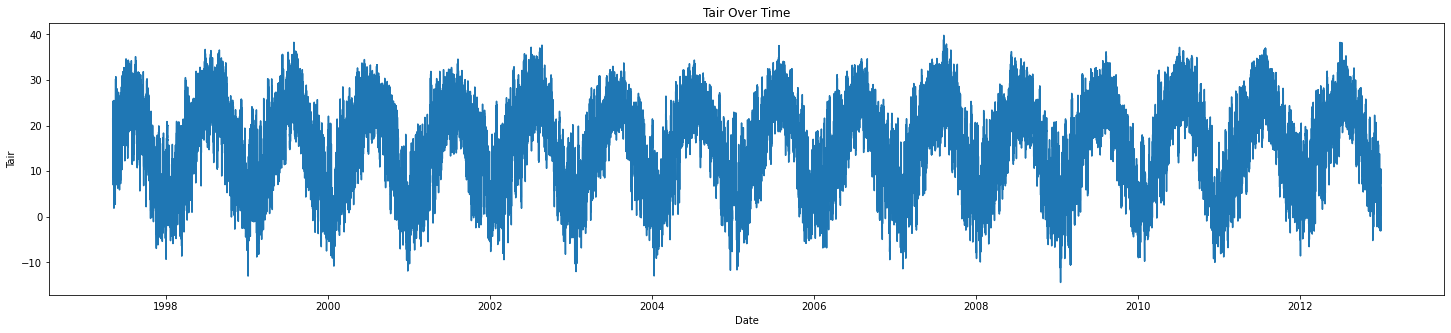

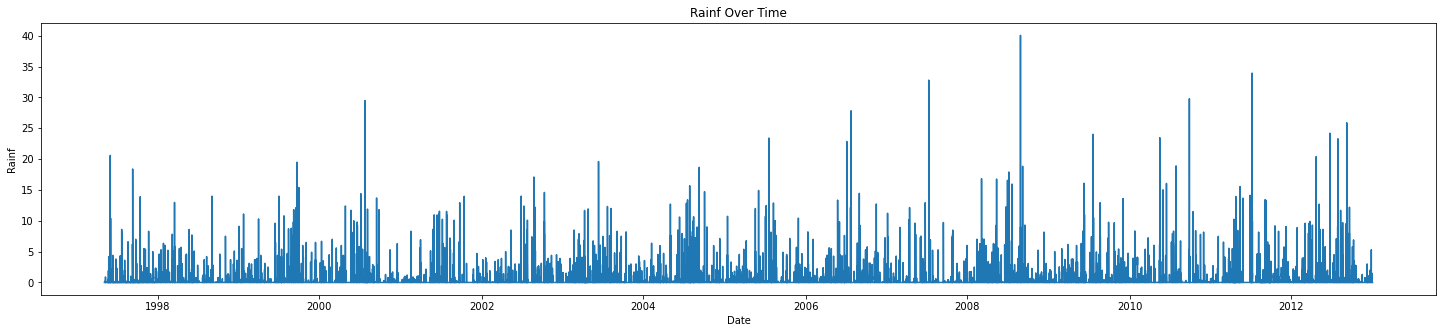

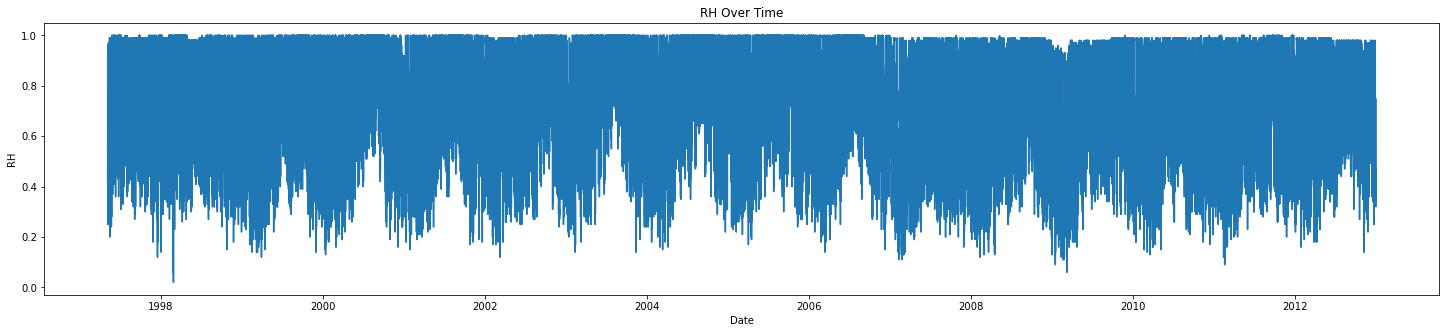

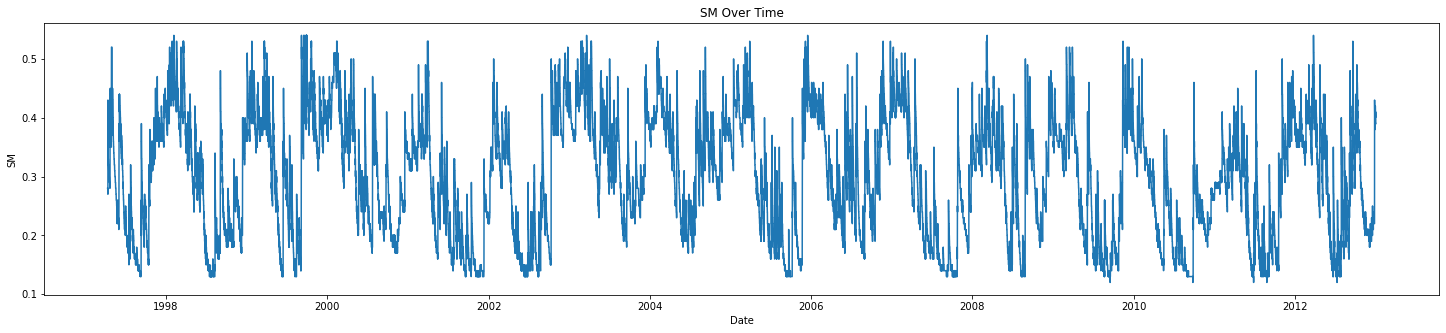

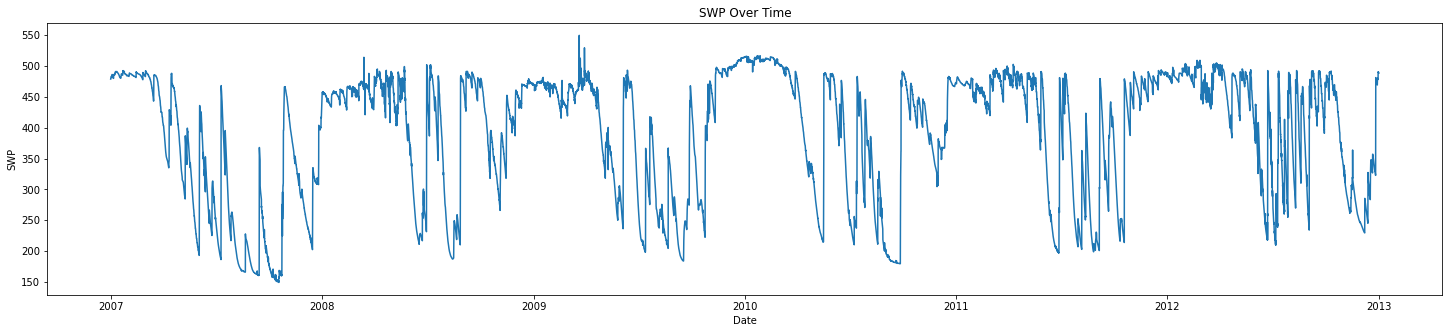

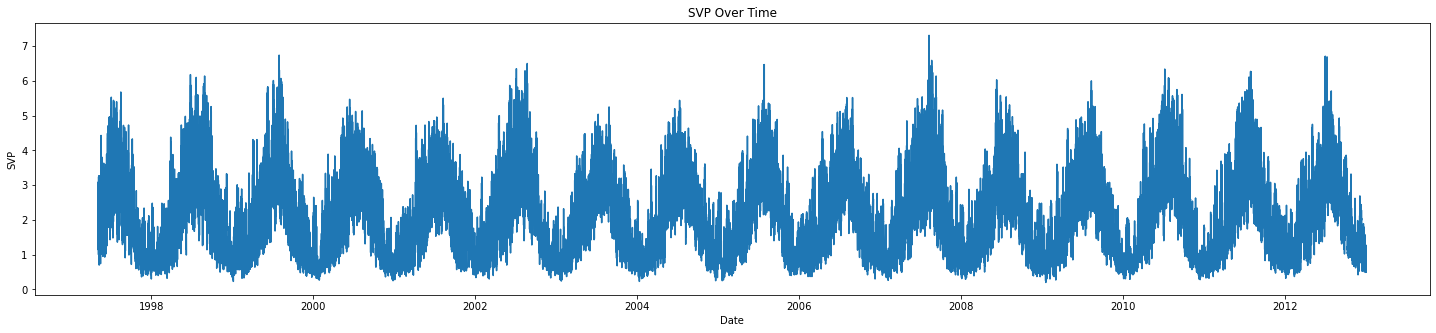

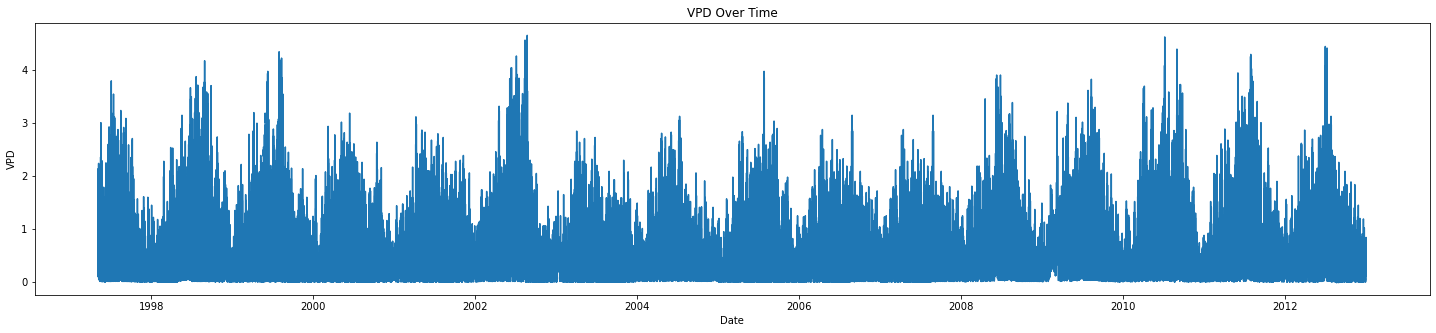

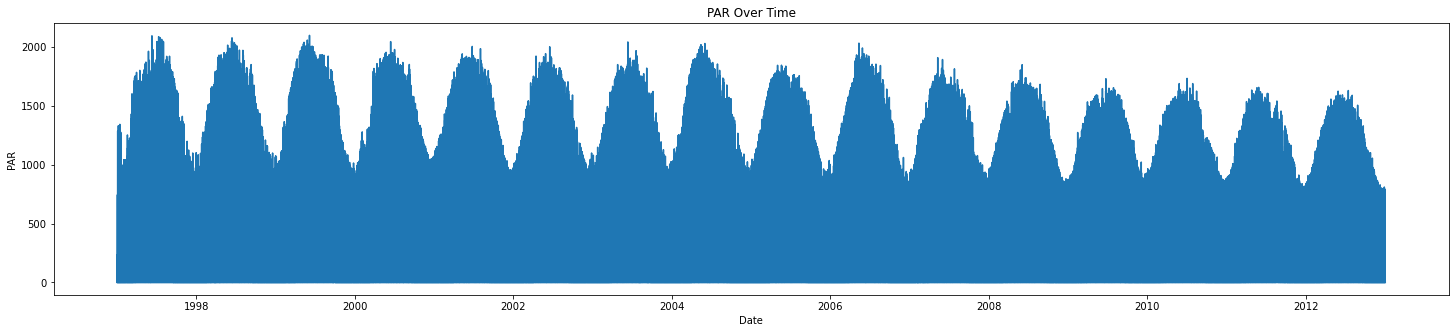

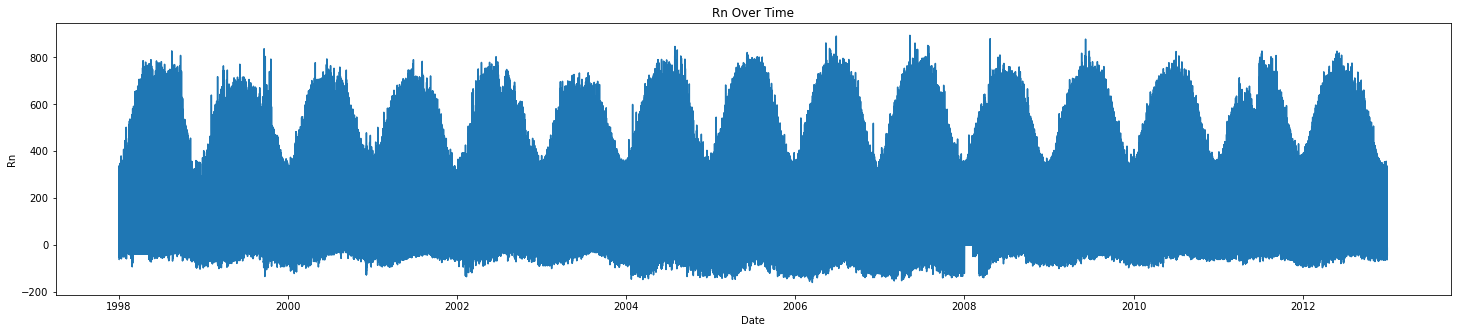

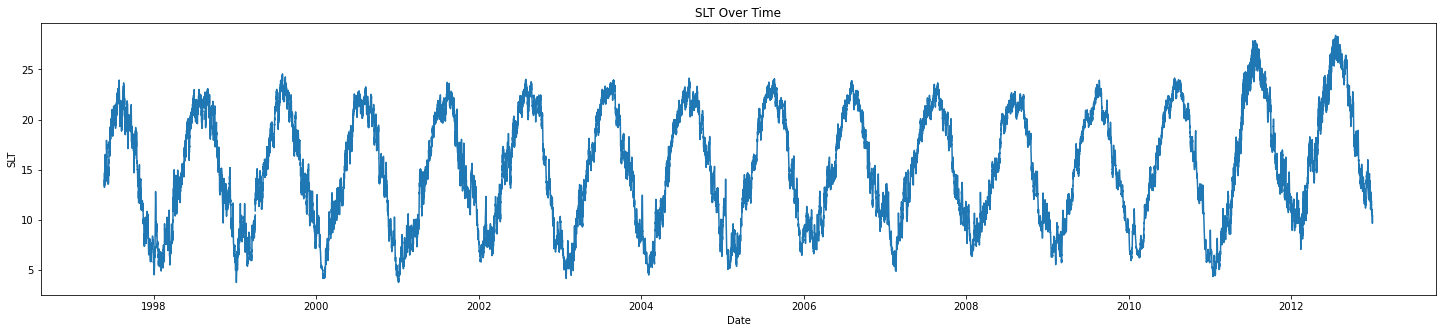

In [90]:
for k in keys_vars:
     # Set the figure size
    plt.figure(figsize=(25, 5))

    # Create the line plot
    plt.plot(df_all_vars_30m['Date'], df_all_vars_30m[k])

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(k)
    plt.title(f'{k} Over Time')


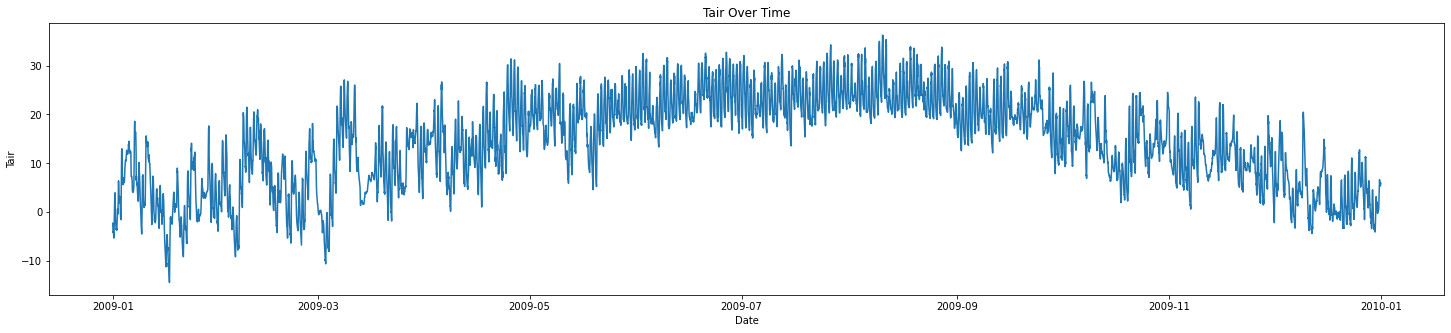

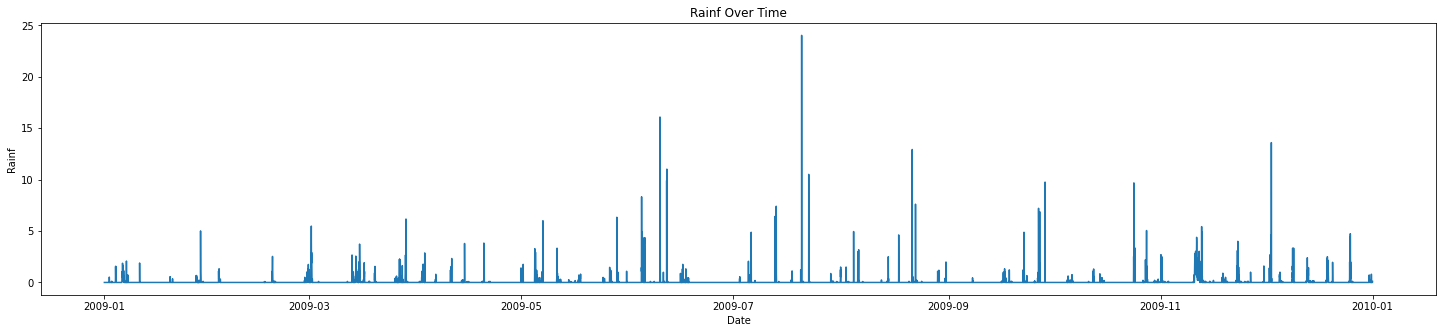

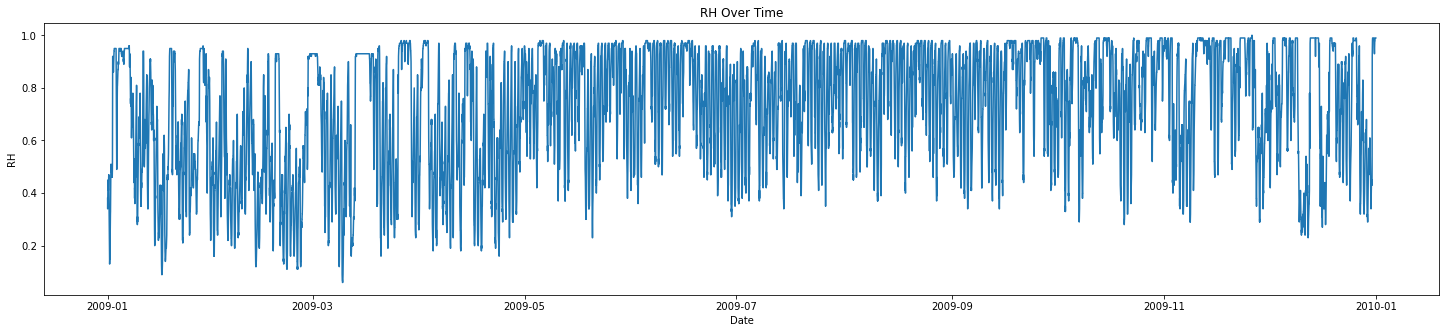

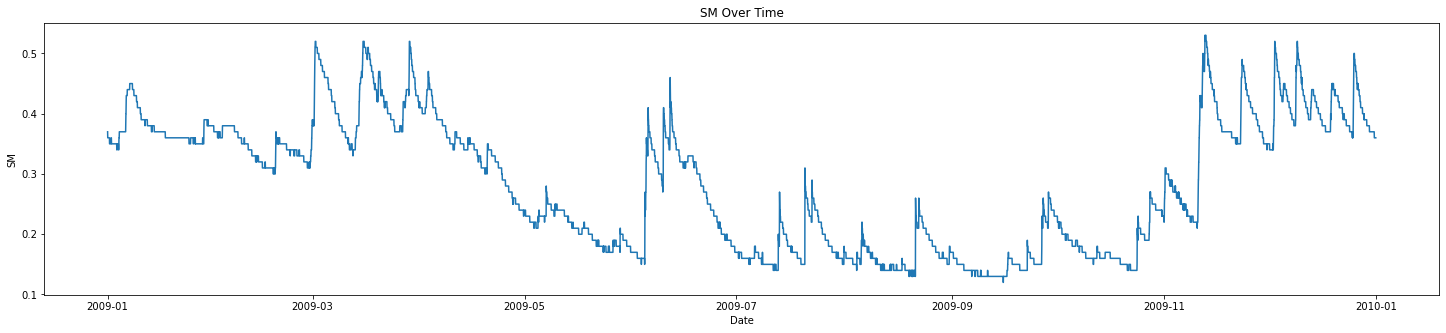

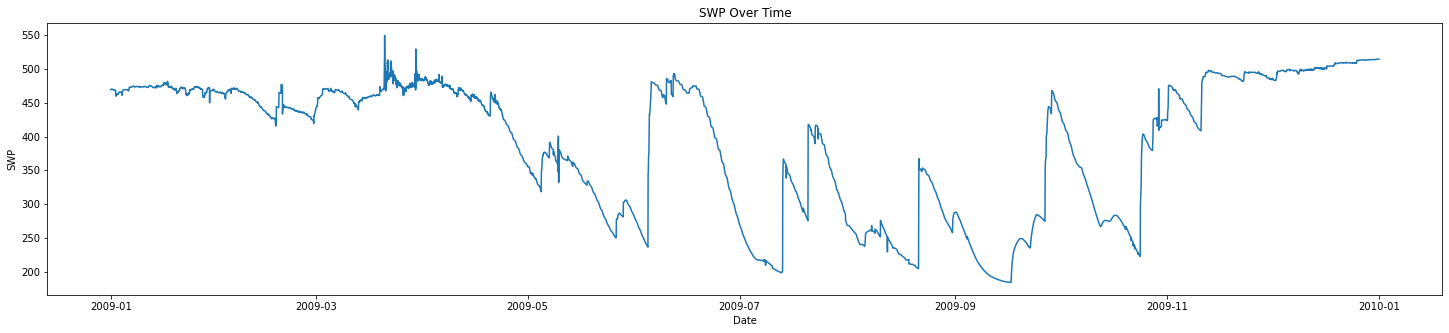

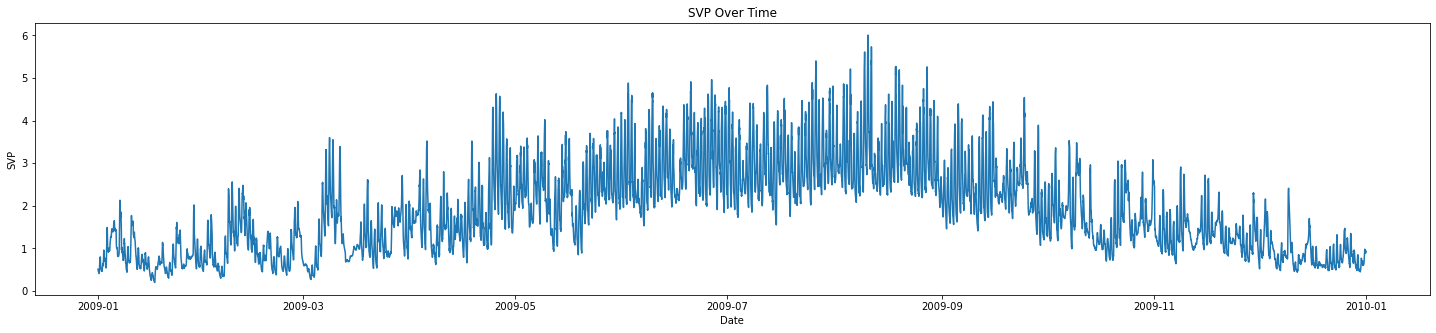

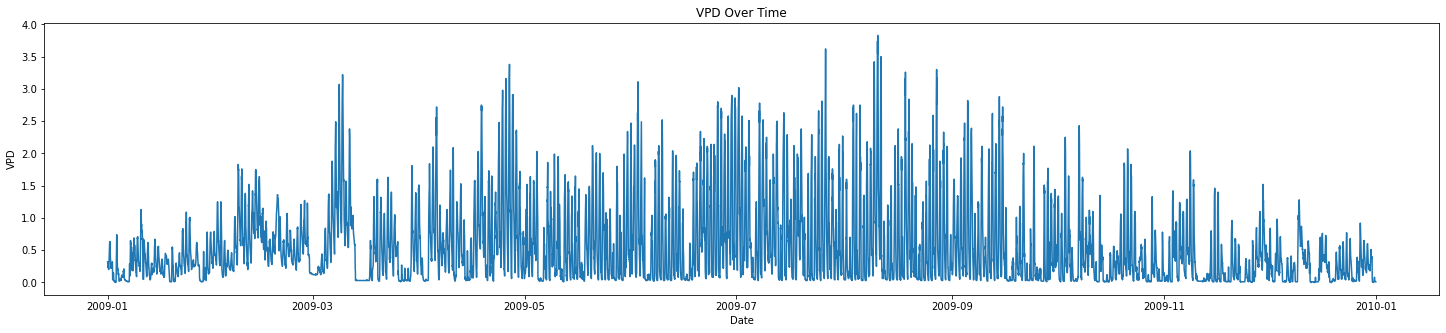

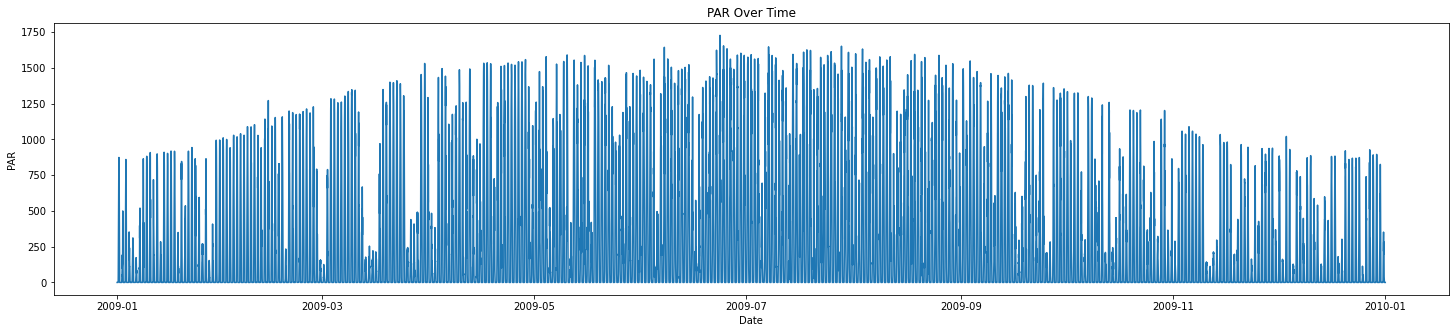

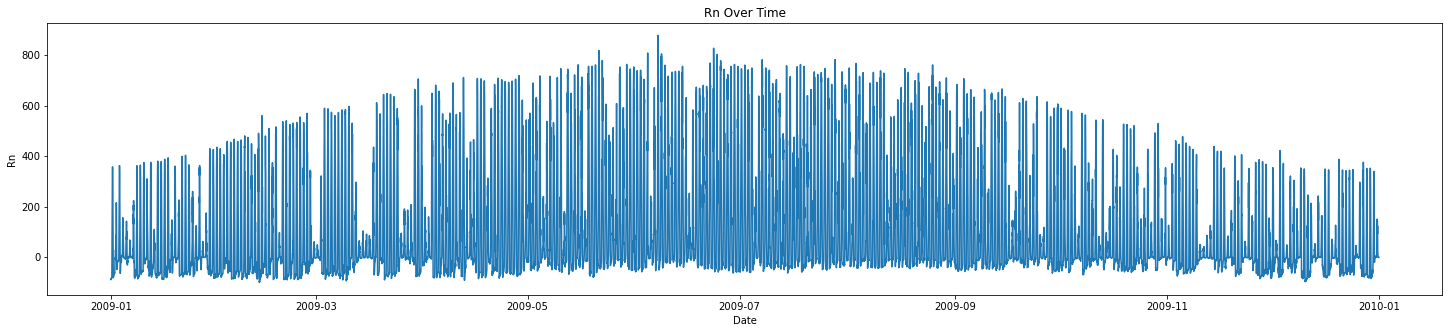

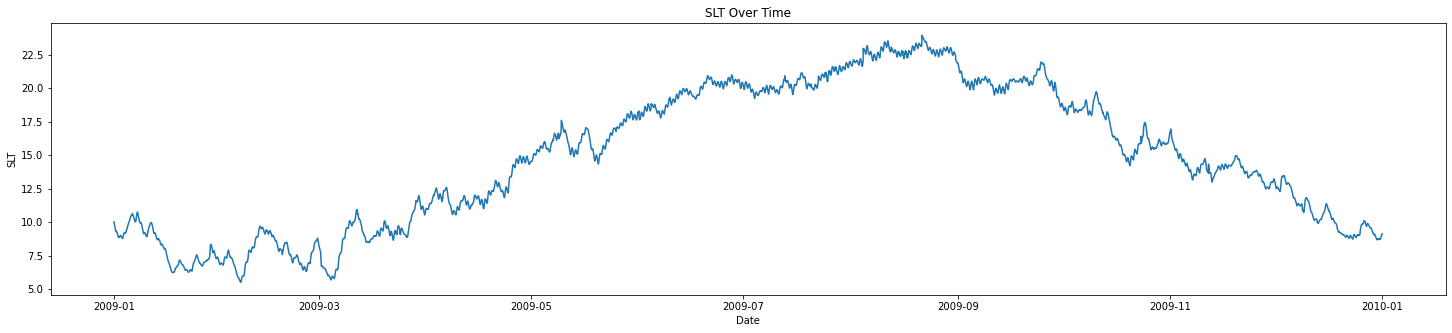

In [91]:
# Filter the DataFrame for the specified date range
start_date = '2009-01-01'
end_date = '2010-01-01'
filtered_df = df_all_vars_30m[(df_all_vars_30m['Date'] >= start_date) & (df_all_vars_30m['Date'] <= end_date)]

for k in keys_vars:
     # Set the figure size
    plt.figure(figsize=(25, 5))

    # Create the line plot
    plt.plot(filtered_df['Date'], filtered_df[k])

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(k)
    plt.title(f'{k} Over Time')


In [92]:
filtered_df

,Year,DOY,Time,PAR,Tair,Rainf,RH,SM,SWP,SVP,VPD,Rn,SLT,Date
210383,2008,366,2400,0.0,-2.27,0.0,0.38,0.37,469.45,0.51,0.32,-88.15,10.02,2009-01-01 00:00:00
210384,2009.0,1.0,30.0,0.0,-2.70,0.0,0.34,0.36,469.50,0.50,0.31,-88.00,9.99,2009-01-01 00:30:00
210385,2009.0,1.0,100.0,0.0,-3.11,0.0,0.38,0.36,469.52,0.48,0.28,-87.15,9.96,2009-01-01 01:00:00
210386,2009.0,1.0,130.0,0.0,-3.37,0.0,0.38,0.36,469.43,0.47,0.27,-86.95,9.92,2009-01-01 01:30:00
210387,2009.0,1.0,200.0,0.0,-3.76,0.0,0.42,0.36,469.55,0.46,0.25,-85.20,9.88,2009-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227899,2009.0,365.0,2200.0,0.0,5.54,0.0,0.99,0.36,514.42,0.91,0.01,-0.16,9.09,2009-12-31 22:00:00
227900,2009.0,365.0,2230.0,0.0,5.66,0.0,0.99,0.36,514.44,0.91,0.01,-0.01,9.10,2009-12-31 22:30:00
227901,2009.0,365.0,2300.0,0.0,5.73,0.0,0.99,0.36,514.48,0.92,0.01,-0.12,9.11,2009-12-31 23:00:00
227902,2009.0,365.0,2330.0,0.0,5.80,0.0,0.99,0.36,514.48,0.92,0.01,-0.10,9.12,2009-12-31 23:30:00


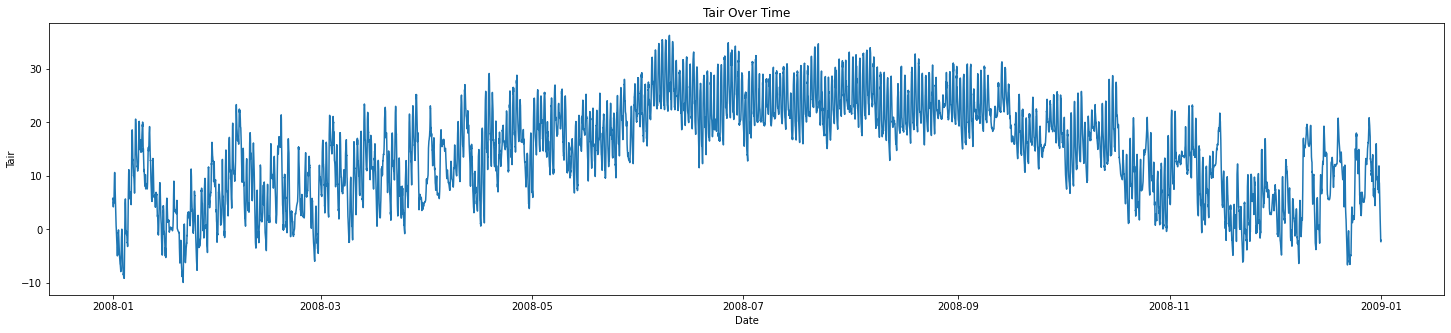

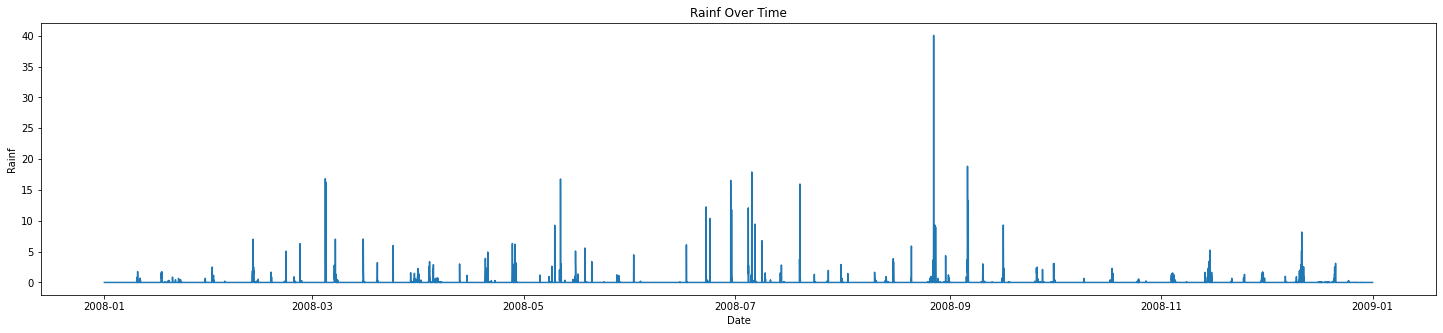

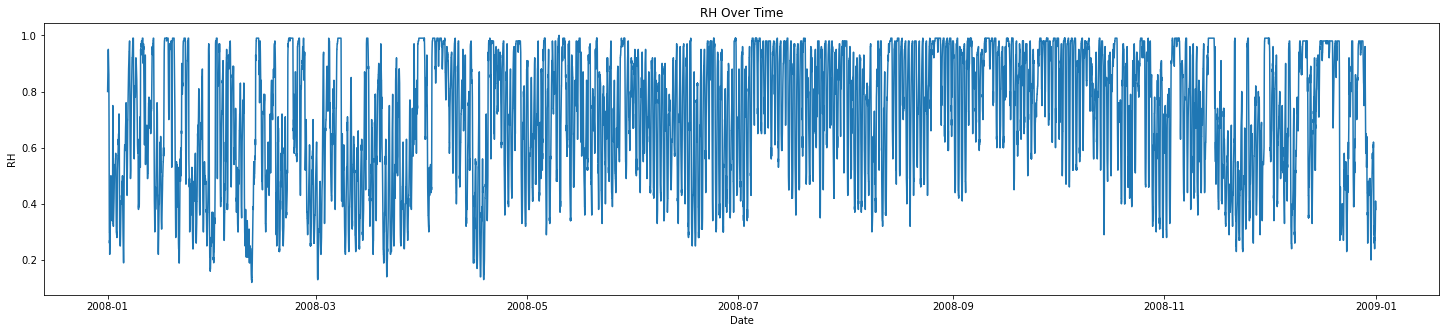

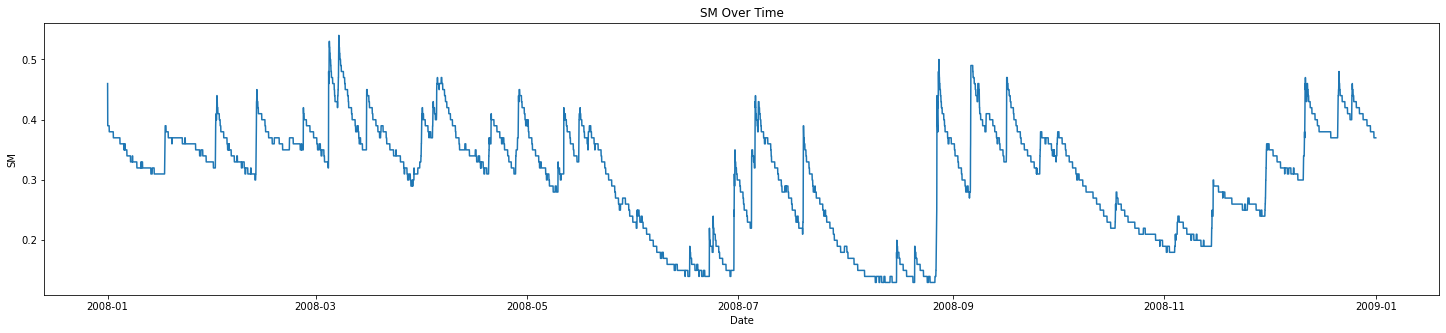

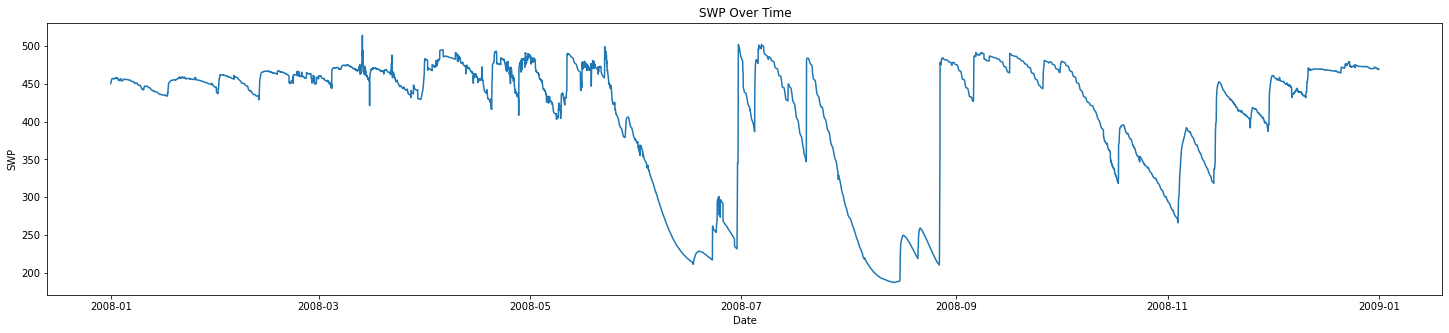

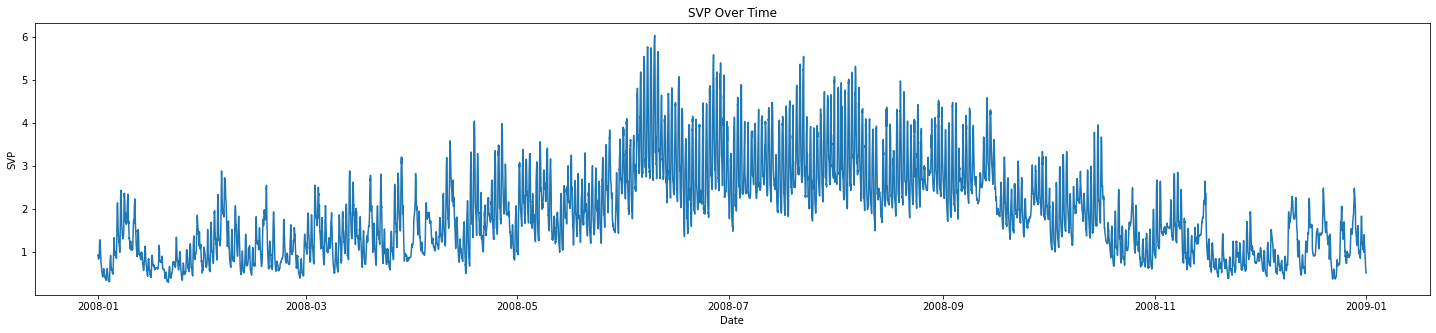

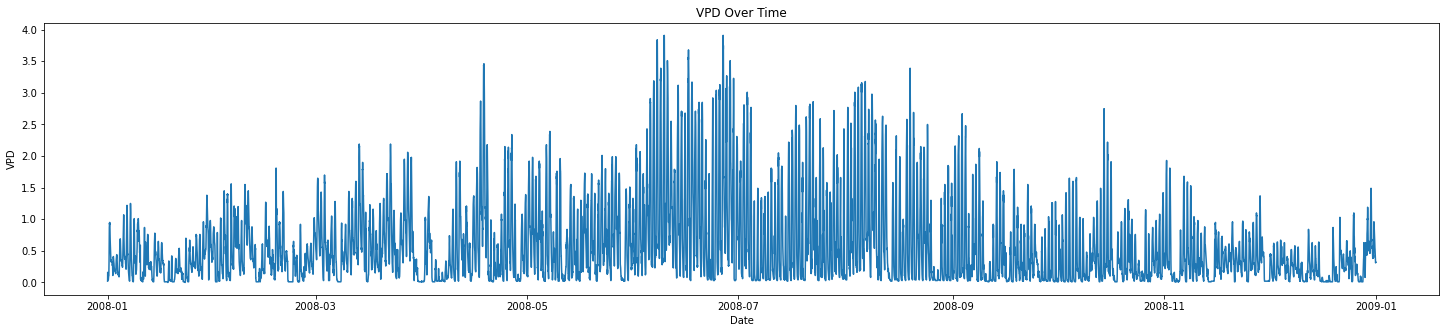

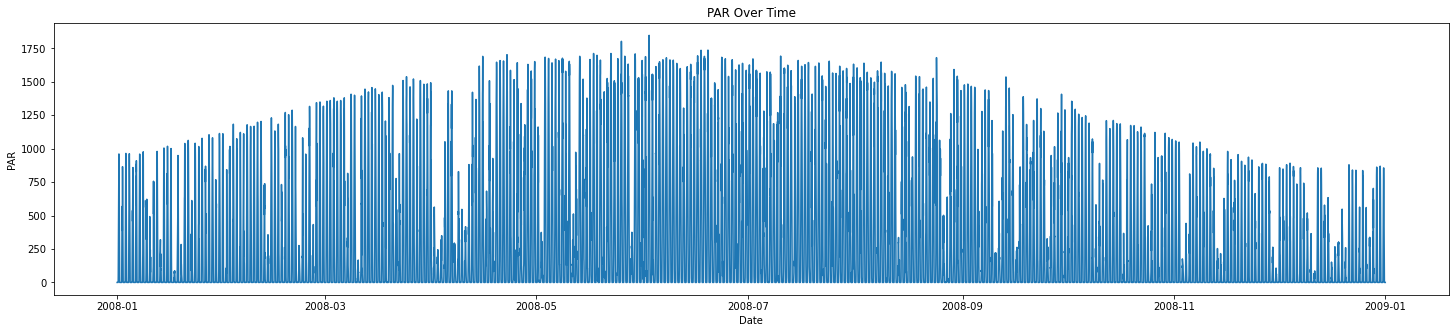

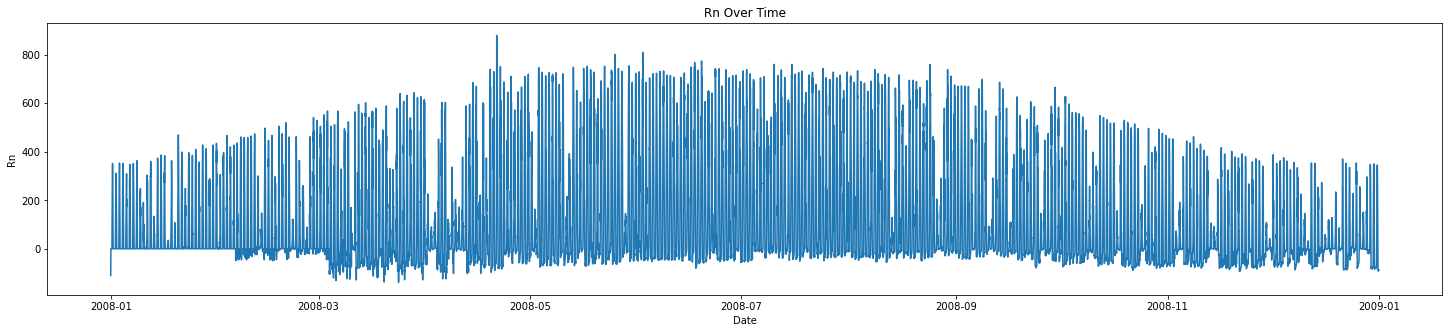

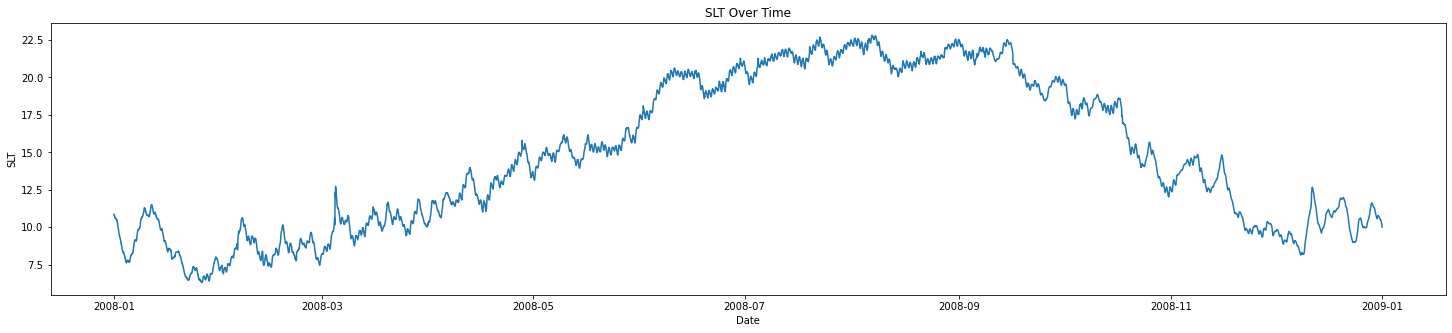

In [93]:
# Filter the DataFrame for the specified date range
start_date = '2008-01-01'
end_date = '2009-01-01'
filtered_df = df_all_vars_30m[(df_all_vars_30m['Date'] >= start_date) & (df_all_vars_30m['Date'] <= end_date)]

for k in keys_vars:
     # Set the figure size
    plt.figure(figsize=(25, 5))

    # Create the line plot
    plt.plot(filtered_df['Date'], filtered_df[k])

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel(k)
    plt.title(f'{k} Over Time')
